In [4]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 573.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 654.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 748.1 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 808.4 kB/s eta 0:00:01
   ------------------------------------ - 286.7/300.2 kB 883.3 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 881.2 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from gensim.corpora import Dictionary
from gensim.models import LdaModel


from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

df = pd.read_csv("flipkart.csv")

df

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [8]:
data= df['review']  #to extract the headline_text column and give it the variable name data

In [9]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

#function to lemmatize and remove stopwords from the text data
def preprocess(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words


#applying the function to the dataset
data = data.apply(preprocess)
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [nice, produt, ., like, 's, design, lot, ., 's...
1       [awesome, sound, ...., pretty, see, nd, sound,...
2       [awesome, sound, quality, ., pro, 7-8, hr, bat...
3       [think, good, product, per, quality, also, des...
4       [awesome, bass, sound, quality, good, bettary,...
                              ...                        
9971                                           [goodread]
9972        [everything, amazimg, built, light, .., read]
9973                                           [goodread]
9974            [best, headphone, ever, used, ...., read]
9975                                           [niceread]
Name: review, Length: 9976, dtype: object

In [10]:
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['sound', 'quality', 'good', 'bass', 'nice', 'battery', 'backup', 'product', 'qualityread', 'super']
Topic: 1
Words: ['.', ',', 'good', 'ear', 'sound', "n't", 'use', 'bluetooth', "'s", 'headphone']
Topic: 2
Words: ['.', ',', 'good', 'product', 'headphone', 'best', 'price', 'bass', 'quality', 'sound']
Topic: 3
Words: ['nice', 'productread', '!', 'product', 'itread', 'buy', 'must', 'awesome', 'best', 'read']
Topic: 4
Words: ['good', '..', '...', 'product', 'goodread', 'read', '....', 'nice', 'niceread', 'productread']


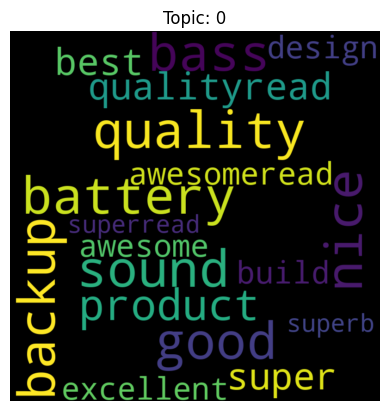

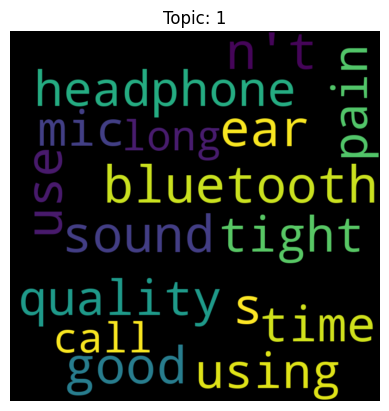

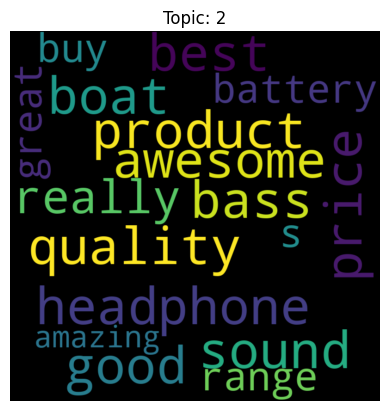

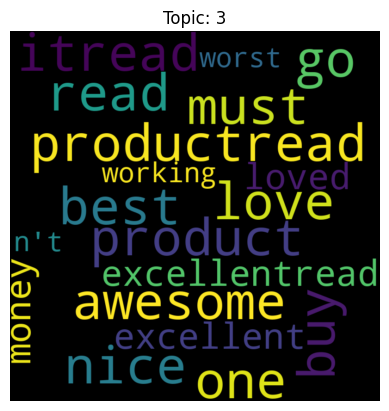

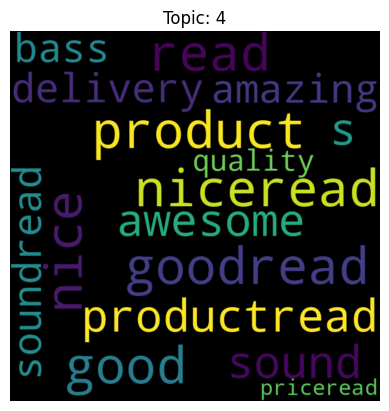

In [11]:
for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()